In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

<class 'ModuleNotFoundError'>: No module named 'seaborn'

In [ ]:
df=pd.read_csv('epl_final.csv')
df

,Season,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,HomeShotsOnTarget,AwayShotsOnTarget,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
0,2000/01,2000-08-19,Charlton,Man City,4,0,H,2,0,H,...,14,4,6,6,13,12,1,2,0,0
1,2000/01,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,...,10,5,7,7,19,14,1,2,0,0
2,2000/01,2000-08-19,Coventry,Middlesbrough,1,3,A,1,1,D,...,3,9,8,4,15,21,5,3,1,0
3,2000/01,2000-08-19,Derby,Southampton,2,2,D,1,2,A,...,4,6,5,8,11,13,1,1,0,0
4,2000/01,2000-08-19,Leeds,Everton,2,0,H,2,0,H,...,8,6,6,4,21,20,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9375,2024/25,2025-05-04,Brentford,Man United,4,3,H,2,1,H,...,6,5,7,4,8,10,0,2,0,0
9376,2024/25,2025-05-04,Brighton,Newcastle,1,1,D,1,0,H,...,2,5,1,4,15,10,2,1,0,0
9377,2024/25,2025-05-04,West Ham,Tottenham,1,1,D,1,1,D,...,2,2,1,3,18,15,2,2,0,0
9378,2024/25,2025-05-04,Chelsea,Liverpool,3,1,H,1,0,H,...,7,2,3,6,10,11,2,2,0,0


In [ ]:

cols_to_drop = [
    'Season', 'MatchDate',
    'FullTimeHomeGoals', 'FullTimeAwayGoals',
    'HalfTimeHomeGoals', 'HalfTimeAwayGoals', 'HalfTimeResult'
]

X = df.drop(columns=cols_to_drop, errors='ignore')
print("Shape of features:", X.shape)
print("Shape of target:", y.shape)


Shape of features: (9380, 14)
Shape of target: (9380,)


In [ ]:
print(df.columns)

Index(['HomeTeam', 'AwayTeam', 'HomeShots', 'AwayShots', 'HomeShotsOnTarget',
       'AwayShotsOnTarget', 'HomeCorners', 'AwayCorners', 'HomeFouls',
       'AwayFouls', 'HomeYellowCards', 'AwayYellowCards', 'HomeRedCards',
       'AwayRedCards'],
      dtype='object')


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

HomeTeam             0
AwayTeam             0
HomeShots            0
AwayShots            0
HomeShotsOnTarget    0
AwayShotsOnTarget    0
HomeCorners          0
AwayCorners          0
HomeFouls            0
AwayFouls            0
HomeYellowCards      0
AwayYellowCards      0
HomeRedCards         0
AwayRedCards         0
dtype: int64

In [ ]:
import pandas as pd
df = pd.read_csv("epl_final.csv")
df = df[['HomeTeam', 'AwayTeam',
       'HomeShots', 'AwayShots', 'HomeShotsOnTarget','FullTimeResult',
       'AwayShotsOnTarget', 'HomeCorners', 'AwayCorners', 'HomeFouls',
       'AwayFouls', 'HomeYellowCards', 'AwayYellowCards', 'HomeRedCards',
       'AwayRedCards']]
df.to_csv("cleaned_dataset_for_matchwinner.csv",index=False)

In [ ]:
import pandas as pd
file_path="cleaned_dataset_for_matchwinner.csv"
df=pd.read_csv(file_path)
categorical_cols=df.select_dtypes(include=['object']).columns
print("Categorical Columns",categorical_cols.tolist())

Categorical Columns ['HomeTeam', 'AwayTeam', 'FullTimeResult']


In [ ]:
print("Target column dtype:", y.dtype)
print("Unique values in target:", y.unique())

Target column dtype: object
Unique values in target: ['H' 'A' 'D']


In [ ]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    if col != 'FullTimeResult':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
le_y = LabelEncoder()
df_encoded['FullTimeResult'] = le_y.fit_transform(df_encoded['FullTimeResult'])

print("Target mapping (FTR):", dict(zip(le_y.classes_, le_y.transform(le_y.classes_))))
print("\nSample after encoding:\n", df_encoded.head())


Target mapping (FTR): {'A': np.int32(0), 'D': np.int32(1), 'H': np.int32(2)}

Sample after encoding:
    HomeTeam  AwayTeam  HomeShots  AwayShots  HomeShotsOnTarget  \
0        12        26         17          8                 14   
1        13        43         17         12                 10   
2        14        28          6         16                  3   
3        16        36          6         13                  4   
4        22        17         17         12                  8   

   FullTimeResult  AwayShotsOnTarget  HomeCorners  AwayCorners  HomeFouls  \
0               2                  4            6            6         13   
1               2                  5            7            7         19   
2               0                  9            8            4         15   
3               1                  6            5            8         11   
4               2                  6            6            4         21   

   AwayFouls  HomeYellowCards  AwayYel

In [ ]:
df_onehot = df.copy()
df_onehot = pd.get_dummies(df_onehot, columns=['HomeTeam', 'AwayTeam','FullTimeResult'], drop_first=True)
print(df_onehot.shape)
print(df_onehot.head())

(9380, 106)
   FullTimeHomeGoals  FullTimeAwayGoals  HomeShots  AwayShots  \
0                  4                  0         17          8   
1                  4                  2         17         12   
2                  1                  3          6         16   
3                  2                  2          6         13   
4                  2                  0         17         12   

   HomeShotsOnTarget  AwayShotsOnTarget  HomeCorners  AwayCorners  HomeFouls  \
0                 14                  4            6            6         13   
1                 10                  5            7            7         19   
2                  3                  9            8            4         15   
3                  4                  6            5            8         11   
4                  8                  6            6            4         21   

   AwayFouls  ...  AwayTeam_Sunderland  AwayTeam_Swansea  AwayTeam_Tottenham  \
0         12  ...                Fal

In [ ]:
import pandas as pd
df = pd.read_csv("cleaned_dataset_for_matchwinner.csv")
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df
df_no_outliers = remove_outliers(df, num_cols)
print("Original shape:", df.shape)
print("After removing outliers:", df_no_outliers.shape)

Original shape: (9380, 15)
After removing outliers: (6723, 15)


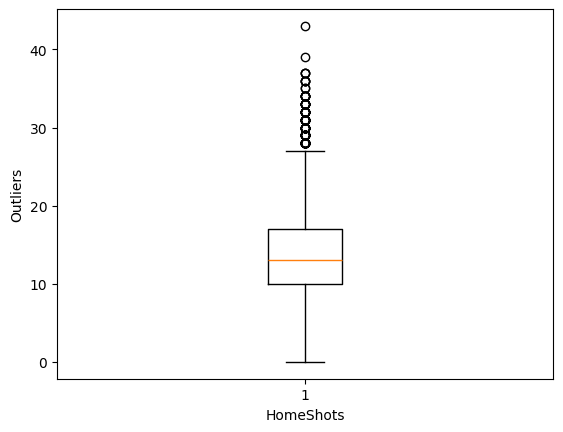

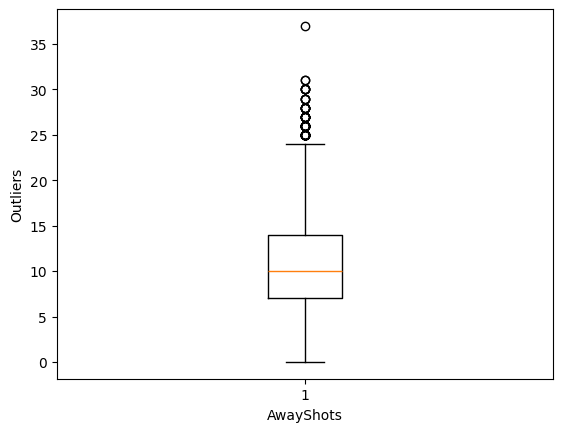

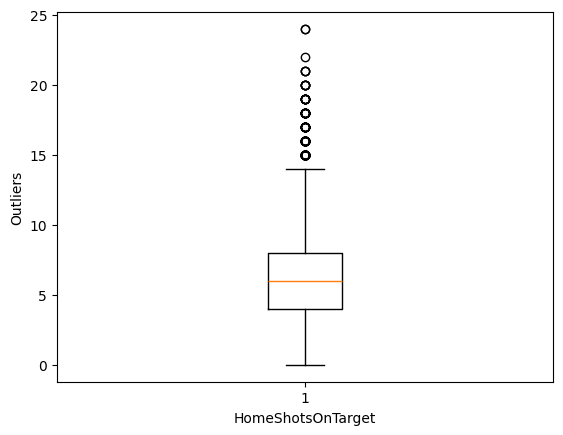

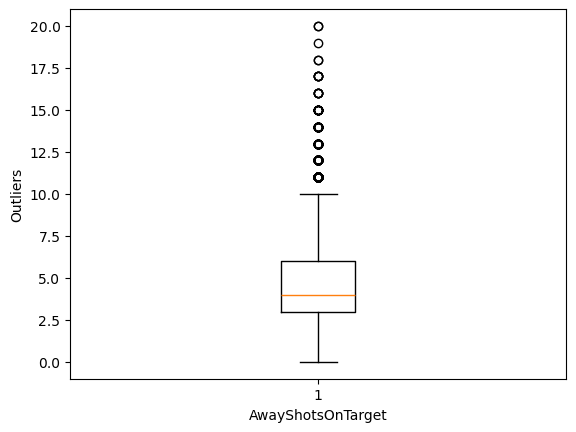

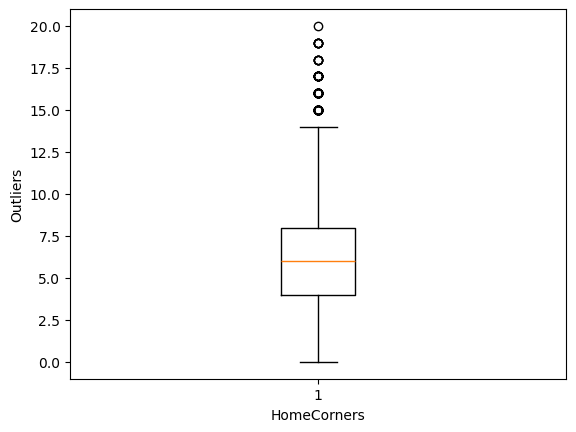

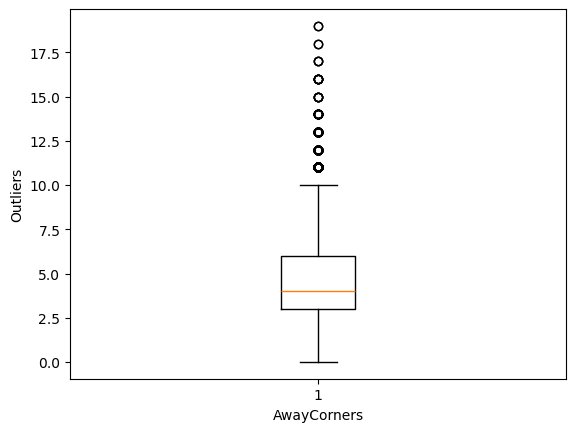

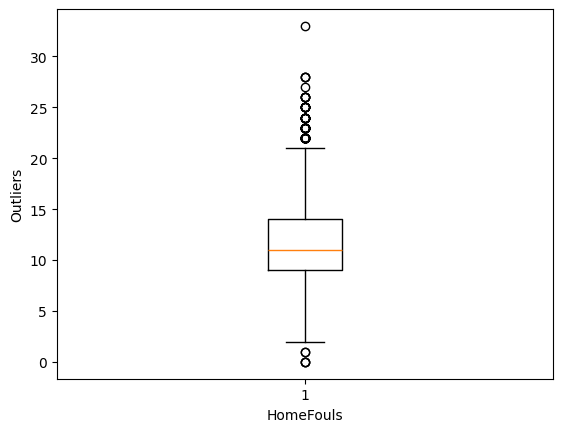

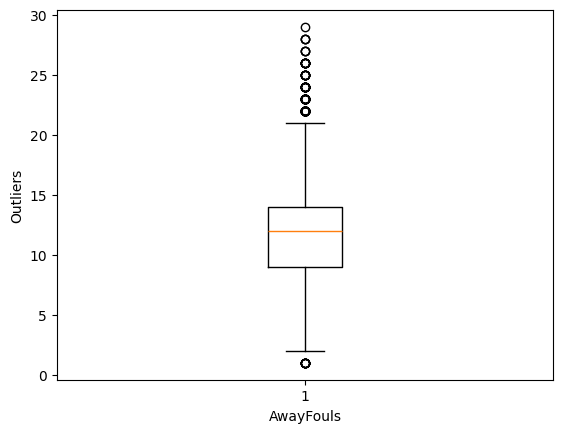

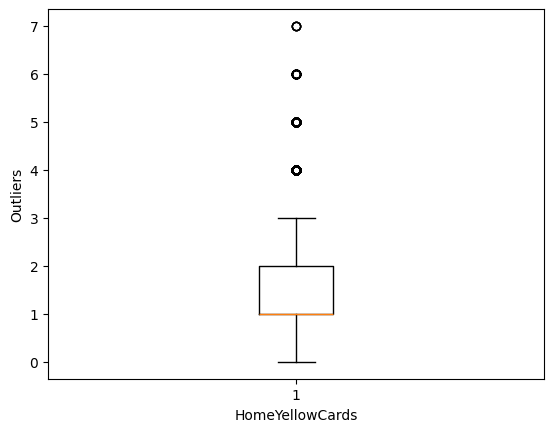

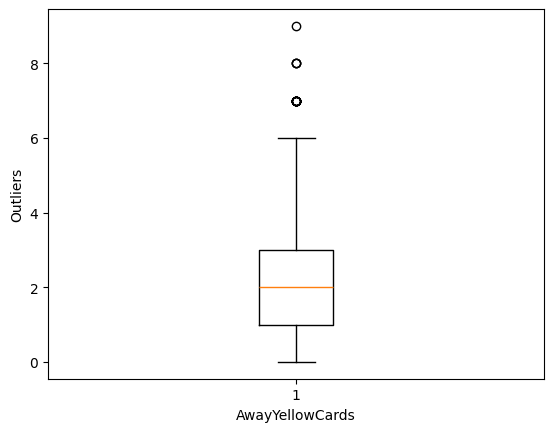

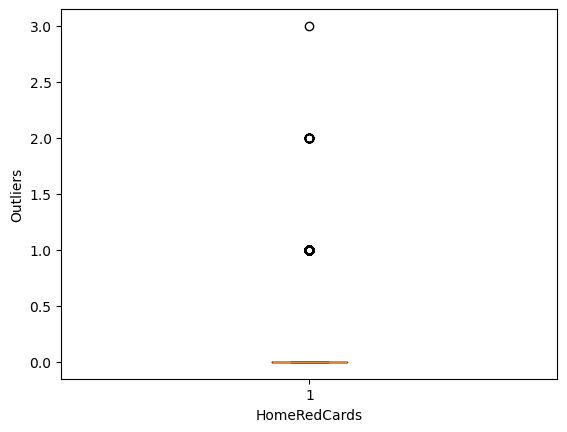

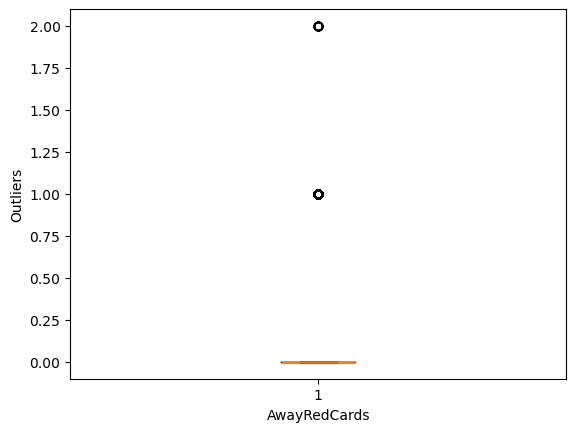

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
for itr in df.columns:
    if df[itr].dtype == np.int64:
        plt.boxplot(df[itr].values)
        plt.xlabel(itr)
        plt.ylabel('Outliers')
        plt.show()

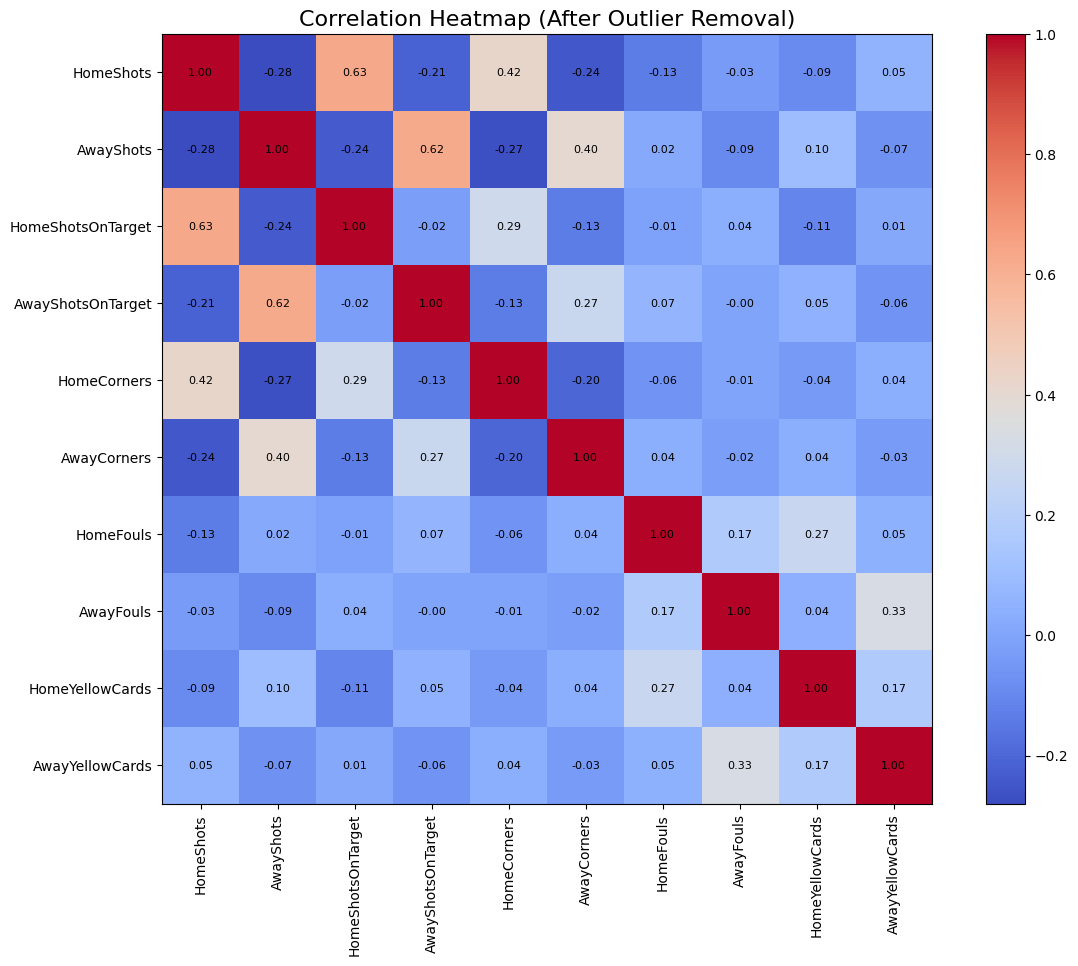

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. only selecting numeric columns that r
num_cols = df_no_outliers.select_dtypes(include=[np.number]).columns.tolist()

# 2. Remove constant columns
cleaned = df_no_outliers[num_cols].loc[:, df_no_outliers[num_cols].apply(pd.Series.nunique) > 1]

# 3. Replace NaN values with 0
cleaned = cleaned.fillna(0)

# 4. Compute correlation
corr = cleaned.corr()

# 5. Plot heatmap
plt.figure(figsize=(14,10))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()

plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}",
                 ha="center", va="center", color="black", fontsize=8)

plt.title("Correlation Heatmap (After Outlier Removal)", fontsize=16)
plt.show()

In [ ]:
print(df_no_outliers['HomeShots'].corr(df_no_outliers['AwayShots']))

-0.256411305109005


In [ ]:
print(df_no_outliers[['HomeShots','AwayShots']].head(20))


    HomeShots  AwayShots
3           6         13
4          17         12
5           5          5
6          16          3
8          20         15
9          19          9
11         12         14
12         13         15
13         12         11
20          8         13
21         12          7
22         14          9
23         14          9
25         15         10
26         14          9
27         17          8
28         12         11
32         11         11
35         13         13
36          9          5


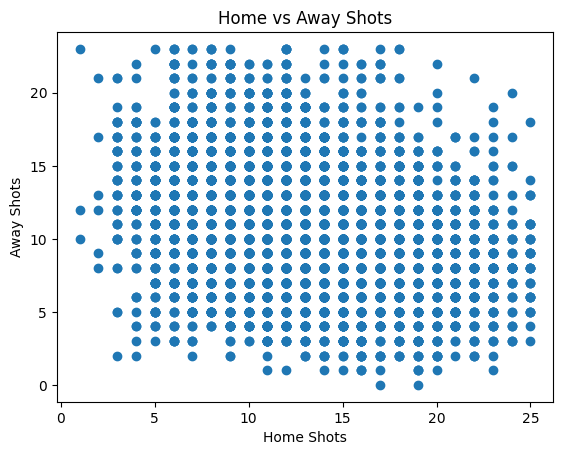

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_no_outliers['HomeShots'], df_no_outliers['AwayShots'])
plt.xlabel("Home Shots")
plt.ylabel("Away Shots")
plt.title("Home vs Away Shots")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['FullTimeResult'] = le.fit_transform(df['FullTimeResult'])

In [ ]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop(columns=['FullTimeResult', 'FullTimeHomeGoals', 'FullTimeAwayGoals'], errors='ignore')
y = df_encoded['FullTimeResult']
print("Features shape (X):", X.shape)
print("Target shape (y):", y.shape)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Features shape (X): (9380, 14)
Target shape (y): (9380,)
Training set shape: (7504, 14) (7504,)
Testing set shape: (1876, 14) (1876,)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_y.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

 Accuracy: 0.5618336886993603

Classification Report:
               precision    recall  f1-score   support

           A       0.56      0.58      0.57       554
           D       0.28      0.09      0.13       462
           H       0.60      0.81      0.69       860

    accuracy                           0.56      1876
   macro avg       0.48      0.49      0.46      1876
weighted avg       0.51      0.56      0.52      1876


Confusion Matrix:
 [[319  50 185]
 [147  41 274]
 [108  58 694]]


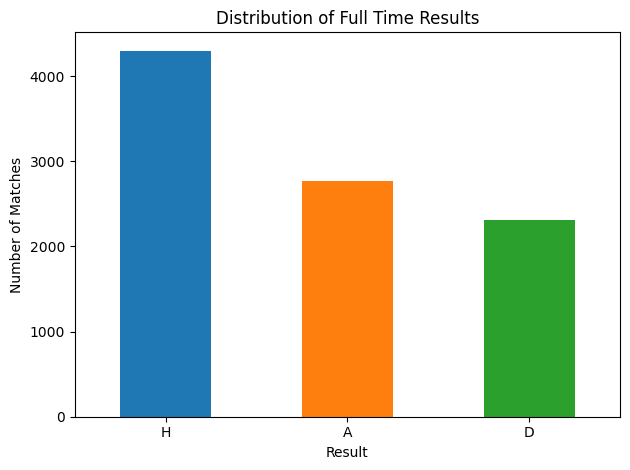

In [ ]:
import matplotlib.pyplot as plt
file_path = "cleaned_dataset_for_matchwinner.csv"
df = pd.read_csv(file_path)
result_counts = df['FullTimeResult'].value_counts()
result_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Distribution of Full Time Results')
plt.xlabel('Result')
plt.ylabel('Number of Matches')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# ----------------------------
# 1. Import Libraries
# ----------------------------
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#loading th dataset
df = pd.read_csv("cleaned_dataset_for_matchwinner.csv")
#dropping the unwanted cols
drop_cols = ['Season', 'MatchDate',
             'FullTimeHomeGoals', 'FullTimeAwayGoals',
             'HalfTimeHomeGoals', 'HalfTimeAwayGoals', 'HalfTimeResult']

df_cleaned = df.drop(columns=drop_cols, errors='ignore')

# encoding the target
target_col = 'FullTimeResult'
df_encoded = df_cleaned.copy()

# Encode categorical columns except target
for col in df_encoded.select_dtypes(include=['object']).columns:
    if col != target_col:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Encode target
le_y = LabelEncoder()
df_encoded[target_col] = le_y.fit_transform(df_encoded[target_col])
#split data
X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
#  Default Random Forest

rf_default = RandomForestClassifier(random_state=42, class_weight="balanced")
rf_default.fit(X_train, y_train)

y_pred_default = rf_default.predict(X_test)

print("\n=== Default Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_default))
print("\nClassification Report:\n", classification_report(y_test, y_pred_default, target_names=le_y.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_default))
#  Hyperparameter Tuning with GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42, class_weight="balanced")

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("\n=== Best Hyperparameters (Random Forest) ===")
print(grid_search.best_params_)
# Tuned Random Forest

rf_best = grid_search.best_estimator_
y_pred_best = rf_best.predict(X_test)

print("\n=== Tuned Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best, target_names=le_y.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


=== Default Random Forest ===
Accuracy: 0.5591684434968017

Classification Report:
               precision    recall  f1-score   support

           A       0.54      0.56      0.55       554
           D       0.34      0.09      0.14       462
           H       0.59      0.81      0.68       860

    accuracy                           0.56      1876
   macro avg       0.49      0.49      0.46      1876
weighted avg       0.51      0.56      0.51      1876


Confusion Matrix:
 [[312  38 204]
 [147  41 274]
 [122  42 696]]

=== Best Hyperparameters (Random Forest) ===
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

=== Tuned Random Forest ===
Accuracy: 0.5687633262260128

Classification Report:
               precision    recall  f1-score   support

           A       0.56      0.58      0.57       554
           D       0.35      0.10      0.15       462
           H       0.60      0.81      0.69       860

    accurac

In [ ]:
from sklearn.utils import resample

# Combine X_train & y_train
train_data = pd.concat([X_train, y_train], axis=1)

# Separate classes
class_counts = y_train.value_counts()
print("Class distribution before balancing:\n", class_counts)

df_majority = train_data[train_data[target_col] == y_train.mode()[0]]
balanced_list = [df_majority]

# Oversample minority classes
for cls in y_train.unique():
    df_class = train_data[train_data[target_col] == cls]
    df_class_upsampled = resample(
        df_class,
        replace=True,
        n_samples=len(df_majority),
        random_state=42
    )
    balanced_list.append(df_class_upsampled)

train_balanced = pd.concat(balanced_list)
X_train_bal = train_balanced.drop(columns=[target_col])
y_train_bal = train_balanced[target_col]

# Retrain
rf_bal = RandomForestClassifier(random_state=42)
rf_bal.fit(X_train_bal, y_train_bal)
y_pred_bal = rf_bal.predict(X_test)

print("\n=== With Oversampling (SMOTE-like) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_bal))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bal, target_names=le_y.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_bal))


Class distribution before balancing:
 FullTimeResult
1    3439
0    3439
2    3439
Name: count, dtype: int64

=== With Oversampling (SMOTE-like) ===
Accuracy: 0.7108527131782946

Classification Report:
               precision    recall  f1-score   support

           A       0.62      0.96      0.75       860
           D       0.85      0.58      0.69       860
           H       0.77      0.60      0.68       860

    accuracy                           0.71      2580
   macro avg       0.75      0.71      0.70      2580
weighted avg       0.75      0.71      0.70      2580


Confusion Matrix:
 [[822  12  26]
 [239 496 125]
 [266  78 516]]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ==============================
# 1. Prepare Data (SMOTE + Scale)
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# ==============================
# 2. Function to build models
# ==============================
def build_nn(model_type, input_dim, output_dim):
    model = Sequential()

    if model_type == "shallow":
        model.add(Dense(128, input_dim=input_dim, activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(output_dim, activation='softmax'))

    elif model_type == "deep":
        model.add(Dense(512, input_dim=input_dim, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))
        model.add(Dense(256, activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(output_dim, activation='softmax'))

    elif model_type == "wide":
        model.add(Dense(1024, input_dim=input_dim, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(512, activation='relu'))
        model.add(Dropout(0.4))
        model.add(Dense(output_dim, activation='softmax'))

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# ==============================
# 3. Train & Evaluate
# ==============================
callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, verbose=1)
]

models = ["shallow", "deep", "wide"]
results = {}

for m in models:
    print(f"\n=== Training {m.upper()} NN ===")
    nn = build_nn(m, X_train_res.shape[1], len(le_y.classes_))
    nn.fit(
        X_train_res, y_train_res,
        validation_data=(X_test, y_test),
        epochs=100,
        batch_size=32,
        callbacks=callbacks,
        verbose=0
    )
    y_pred = nn.predict(X_test).argmax(axis=1)
    acc = accuracy_score(y_test, y_pred)
    results[m] = acc
    print(f"{m.upper()} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=le_y.classes_))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ==============================
# 4. Ensemble (Average Predictions)
# ==============================
print("\n=== Ensemble of All NNs ===")
preds = []
for m in models:
    nn = build_nn(m, X_train_res.shape[1], len(le_y.classes_))
    nn.fit(
        X_train_res, y_train_res,
        validation_data=(X_test, y_test),
        epochs=50,
        batch_size=32,
        verbose=0
    )
    preds.append(nn.predict(X_test))

avg_pred = np.mean(preds, axis=0).argmax(axis=1)
ensemble_acc = accuracy_score(y_test, avg_pred)
print(f"Ensemble Accuracy: {ensemble_acc:.4f}")
print(classification_report(y_test, avg_pred, target_names=le_y.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, avg_pred))



=== Training SHALLOW NN ===


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 18: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
SHALLOW Accuracy: 0.5650
              precision    recall  f1-score   support

           A       0.54      0.63      0.58       554
           D       0.36      0.27      0.31       462
           H       0.66      0.68      0.67       860

    accuracy                           0.57      1876
   macro avg       0.52      0.53      0.52      1876
weighted avg       0.55      0.57      0.56      1876

Confusion Matrix:
 [[349  92 113]
 [154 125 183]
 [139 135 586]]

=== Training DEEP NN ===


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 15: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 20: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
DEEP Accuracy: 0.5453
              precision    recall  f1-score   support

           A       0.52      0.64      0.57       554
           D       0.32      0.24      0.28       462
           H       0.66      0.65      0.65       860

    accuracy                           0.55      1876
   macro avg       0.50      0.51      0.50      1876
weighted avg       0.54      0.55      0.54      1876

Confusion Matrix:
 [[356  94 104]
 [171 112 179]
 [161 144 555]]

=== Training WIDE NN ===


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
WIDE Accuracy: 0.5554
              precision    recall  f1-score   support

           A       0.54      0.59      0.57       554
           D       0.33      0.23      0.27       462
           H       0.64      0.71      0.67       860

    accuracy                           0.56      1876
   macro avg       0.50      0.51      0.50      1876
weighted avg       0.54      0.56      0.54      1876

Confusion Matrix:
 [[328  94 132]
 [151 106 205]
 [127 125 608]]

=== Ensemble of All NNs ===


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Ensemble Accuracy: 0.5283
              precision    recall  f1-score   support

           A       0.51      0.61      0.56       554
           D       0.31      0.29      0.30       462
           H       0.66      0.60      0.63       860

    accuracy                           0.53      1876
   macro avg       0.49      0.50      0.50      1876
weighted avg       0.53      0.53      0.53      1876

Confusion Matrix:
 [[340 115  99]
 [163 132 167]
 [160 181 519]]


In [ ]:
# ==============================
# 0. Install packages
# ==============================
!pip install imbalanced-learn xgboost lightgbm -q

# ==============================
# 1. Import Libraries
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.utils import resample

# ==============================
# 2. Mount Google Drive
# ==============================
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/Matchwinner/cleaned_dataset_for_matchwinner.csv"

# ==============================
# 3. Load Dataset
# ==============================
df = pd.read_csv(file_path)

drop_cols = ['Season', 'MatchDate',
             'FullTimeHomeGoals', 'FullTimeAwayGoals',
             'HalfTimeHomeGoals', 'HalfTimeAwayGoals', 'HalfTimeResult']

df_cleaned = df.drop(columns=drop_cols, errors='ignore')
target_col = 'FullTimeResult'

# Encode categorical features
for col in df_cleaned.select_dtypes(include=['object']).columns:
    if col != target_col:
        le = LabelEncoder()
        df_cleaned[col] = le.fit_transform(df_cleaned[col].astype(str))

# Encode target
le_y = LabelEncoder()
df_cleaned[target_col] = le_y.fit_transform(df_cleaned[target_col])

X = df_cleaned.drop(columns=[target_col])
y = df_cleaned[target_col]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ==============================
# 4. Manual Oversampling (like your old code)
# ==============================
train_data = pd.concat([X_train, y_train], axis=1)
majority_class = y_train.mode()[0]
df_majority = train_data[train_data[target_col] == majority_class]
balanced_list = [df_majority]

for cls in y_train.unique():
    df_class = train_data[train_data[target_col] == cls]
    df_class_upsampled = resample(df_class,
                                  replace=True,
                                  n_samples=len(df_majority),
                                  random_state=42)
    balanced_list.append(df_class_upsampled)

train_balanced = pd.concat(balanced_list)
X_train_bal = train_balanced.drop(columns=[target_col])
y_train_bal = train_balanced[target_col]

# Scaling for NN
scaler = StandardScaler()
X_train_bal_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

# ==============================
# 5. Train Models
# ==============================
results = {}

# --- Random Forest ---
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)
y_pred_rf = rf.predict(X_test)
results["Random Forest"] = accuracy_score(y_test, y_pred_rf)

print("\n=== Random Forest ===")
print("Accuracy:", results["Random Forest"])
print(classification_report(y_test, y_pred_rf, target_names=le_y.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# --- XGBoost ---
xgb = XGBClassifier(random_state=42, eval_metric="mlogloss", use_label_encoder=False)
xgb.fit(X_train_bal, y_train_bal)
y_pred_xgb = xgb.predict(X_test)
results["XGBoost"] = accuracy_score(y_test, y_pred_xgb)

print("\n=== XGBoost ===")
print("Accuracy:", results["XGBoost"])
print(classification_report(y_test, y_pred_xgb, target_names=le_y.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

# --- LightGBM ---
lgb = LGBMClassifier(random_state=42)
lgb.fit(X_train_bal, y_train_bal)
y_pred_lgb = lgb.predict(X_test)
results["LightGBM"] = accuracy_score(y_test, y_pred_lgb)

print("\n=== LightGBM ===")
print("Accuracy:", results["LightGBM"])
print(classification_report(y_test, y_pred_lgb, target_names=le_y.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgb))

# --- Neural Network ---
nn = Sequential([
    Dense(256, input_dim=X_train_bal_scaled.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(le_y.classes_), activation='softmax')
])

nn.compile(optimizer=Adam(learning_rate=0.001),
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

nn.fit(X_train_bal_scaled, y_train_bal,
       validation_data=(X_test_scaled, y_test),
       epochs=100, batch_size=32,
       callbacks=[early_stop], verbose=0)

y_pred_nn = nn.predict(X_test_scaled).argmax(axis=1)
results["Neural Network"] = accuracy_score(y_test, y_pred_nn)

print("\n=== Neural Network ===")
print("Accuracy:", results["Neural Network"])
print(classification_report(y_test, y_pred_nn, target_names=le_y.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))

# ==============================
# 6. Final Accuracy Comparison
# ==============================
print("\n=== Final Accuracy Comparison ===")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

=== Random Forest ===
Accuracy: 0.5554371002132196
              precision    recall  f1-score   support

           A       0.59      0.48      0.53       554
           D       0.30      0.09      0.14       462
           H       0.57      0.85      0.68       860

    accuracy                           0.56      1876
   macro avg       0.49      0.47      0.45      1876
weighted avg       0.51      0.56      0.50      1876

Confusion Matrix:
 [[267  50 237]
 [103  41 318]
 [ 82  44 734]]


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:02:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost ===
Accuracy: 0.5639658848614072
              precision    recall  f1-score   support

           A       0.62      0.52      0.57       554
           D       0.31      0.17      0.22       462
           H       0.59      0.80      0.68       860

    accuracy                           0.56      1876
   macro avg       0.51      0.50      0.49      1876
weighted avg       0.53      0.56      0.53      1876

Confusion Matrix:
 [[288  73 193]
 [105  78 279]
 [ 70  98 692]]
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 13756, number of used features: 14
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -0.6

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== Neural Network ===
Accuracy: 0.5682302771855011
              precision    recall  f1-score   support

           A       0.54      0.57      0.55       554
           D       0.32      0.03      0.05       462
           H       0.59      0.86      0.70       860

    accuracy                           0.57      1876
   macro avg       0.48      0.48      0.43      1876
weighted avg       0.51      0.57      0.50      1876

Confusion Matrix:
 [[316  16 222]
 [157  12 293]
 [112  10 738]]

=== Final Accuracy Comparison ===
Random Forest: 0.5554
XGBoost: 0.5640
LightGBM: 0.5608
Neural Network: 0.5682
